<a href="https://colab.research.google.com/github/jinsooya/emba/blob/main/03_agentic-search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

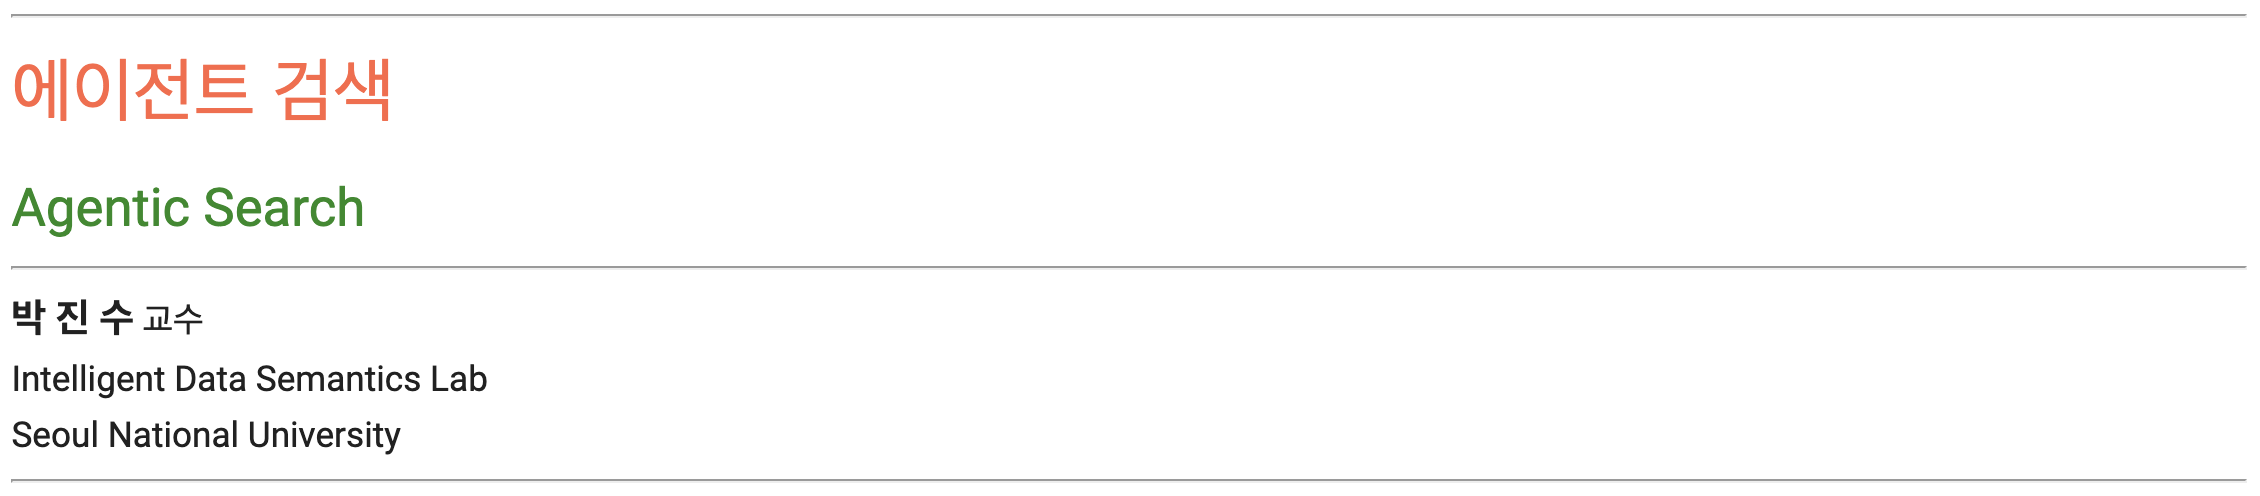

- - -

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**<font size='+2'>목차**

>[Setting up Search API](#scrollTo=WzYqr1RT95Lt)

>[도우미 함수](#scrollTo=gdzvu749qPfV)

>[일반 검색](#scrollTo=pqeDFW1BI2bT)

>[에이전트 검색](#scrollTo=KFIy1LBgojY7)



# Setting up Search API

In [ ]:
!python -m pip install --quiet tavily-python ddgs

**<font size='+1'>API Key 발급</font>**
- API Key 발급 및 Tavily에 대한 내용은 아래 자료를 참고한다.
  - https://drive.google.com/file/d/121GfCnU7oerwJxabrAdQ-IHsxAgzDp-E/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'TAVILY_API_KEY'라는 이름으로 등록한다.

In [ ]:
# --- 방법 1
from tavily import TavilyClient
from google.colab import userdata
client = TavilyClient(api_key=userdata.get('TAVILY_API_KEY'))

In [ ]:
# --- 방법 2 - API Key를 입력한다.
import os, getpass
from tavily import TavilyClient
os.environ['TAVILY_API_KEY'] = getpass.getpass('Enter Your Tavily API Key: ')
client = TavilyClient()

# 도우미 함수

In [ ]:
# Colab의 출력 결과를 자동으로 줄바꿈한다.
from IPython.display import HTML, display

def set_css():
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;
        }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)

# 일반 검색

In [ ]:
from ddgs import DDGS  # Duckduckgo Search

ddg = DDGS()

query = '이순신 장군은 누군가요?'
results = ddg.text(query)
for result in results:
    print(result)

In [ ]:
# 검색 결과에서 url만 추출한다.
for result in results:
    print(result['href'])

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://ko.wikipedia.org/wiki/이순신'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)'}
response = requests.get(URL, headers=headers)
bs = BeautifulSoup(response.text, 'html.parser')

# div 태그 중 id가 bodyContent인 첫 번째 요소를 탐색하여 변수 body에 저장한다.
body = bs.find('div', id='bodyContent')

# body의 하위에 있는 모든 <h1>, <h2>, <h3>, <p>태그를 탐색하여 변수 texts에 저장한다.
texts = body.find_all(['h1', 'h2', 'h3', 'p'])

# 리스트 texts 안의 각 객체에 대해 HTML 코드를 제거하고 내용 텍스트만 리스트로 추가한다.
texts = [text.get_text(separator=' ', strip=True) for text in texts]

# 모든 내용을 단일 문자열로 결합한다.
texts = '\n'.join(texts)

In [ ]:
# 결합한 텍스트에서 여러 개의 연속된 공백 문자를 단일 공백 문자로 대체한다.
import re

texts = re.sub(r'\s+', ' ', texts)
print(f'Website: {URL}\n')
print(f'내용:\n{texts}')

# 에이전트 검색

In [ ]:
query = '이순신 장군은 누군가요?'
result = client.search(
    query=query,
    include_answer=True
)
result['answer']

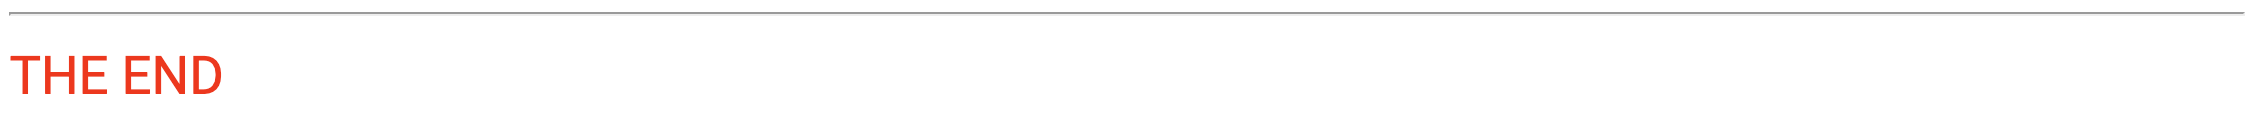